In [323]:
pip install --upgrade keras

In [324]:
import keras
print(keras.__version__)

3.9.2


In [325]:
import pandas as pd


In [326]:
import matplotlib.pyplot as plt

In [327]:
import seaborn as sns

In [328]:
df=pd.read_csv('/content/loan_data.csv')

In [329]:
df=df.drop('Loan_ID',axis=1)

In [330]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [331]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [333]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [334]:
df.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,322
CoapplicantIncome,182
LoanAmount,101
Loan_Amount_Term,10
Credit_History,2


In [335]:
df.shape

(381, 12)

In [336]:
df.size

4572

In [337]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

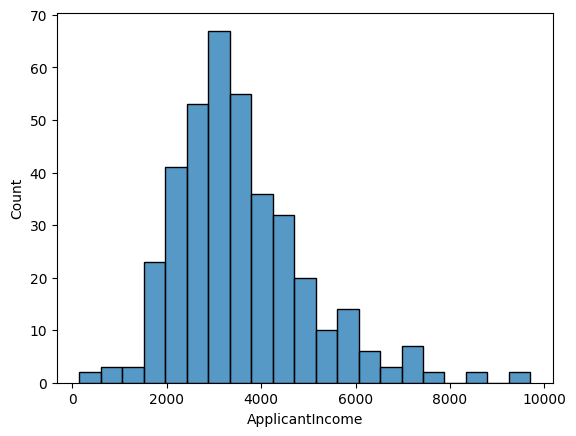

In [338]:
sns.histplot(df['ApplicantIncome'])

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

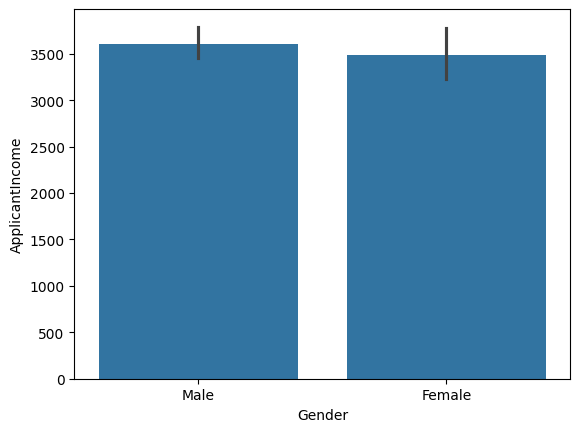

In [339]:
sns.barplot(x='Gender',y='ApplicantIncome',data=df)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

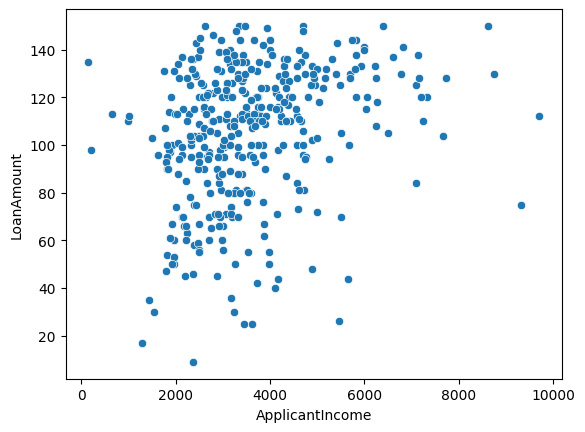

In [340]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)

In [341]:
df.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [342]:
label=df['Gender'].mode(0)

In [343]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-343-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [344]:
label=df['Self_Employed'].mode(0)

In [345]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<ipython-input-345-9efd06336c1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [346]:
label=df['Dependents'].mode(0)

In [347]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

<ipython-input-347-ff7bb676ed6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [348]:
label=df['Credit_History'].median(0)

In [349]:
df['Credit_History'].fillna(label,inplace=True)

<ipython-input-349-33c70d449450>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(label,inplace=True)


In [350]:
label=df['Loan_Amount_Term'].median(0)

In [351]:
df['Loan_Amount_Term'].fillna(label,inplace=True)

<ipython-input-351-e1da64df232d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(label,inplace=True)


<Axes: xlabel='Credit_History', ylabel='Count'>

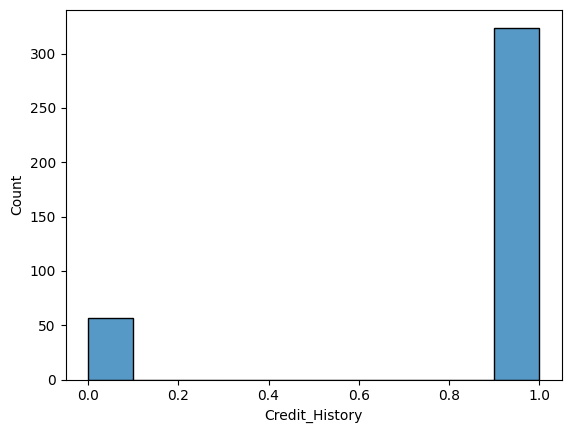

In [352]:
sns.histplot(df['Credit_History'])

In [353]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [354]:
from sklearn.preprocessing import LabelEncoder

In [355]:
le=LabelEncoder()

In [356]:
df['Gender']=le.fit_transform(df['Gender'])

In [357]:
df['Married']=le.fit_transform(df['Married'])

In [358]:
df['Education']=le.fit_transform(df['Education'])

In [359]:
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [360]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [361]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [362]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [363]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [364]:
x=df.drop('Loan_Status',axis=1)

In [365]:
y=df['Loan_Status']

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [368]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [369]:
import keras
from keras import layers
from keras import ops

In [370]:
model = keras.Sequential()
model.add(keras.Input(shape=(11,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [371]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [372]:
model.compile(optimizer='adam',
              metrics=['accuracy'],
                       loss='BinaryCrossentropy')

In [373]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    verbose="auto",
    callbacks=None,
   validation_split=0.2,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.3557 - loss: 0.7159 - val_accuracy: 0.4524 - val_loss: 0.6994
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4273 - loss: 0.7033 - val_accuracy: 0.5159 - val_loss: 0.6927
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5523 - loss: 0.6930 - val_accuracy: 0.5476 - val_loss: 0.6880
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6129 - loss: 0.6858 - val_accuracy: 0.5873 - val_loss: 0.6837
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6438 - loss: 0.6701 - val_accuracy: 0.6349 - val_loss: 0.6802
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7126 - loss: 0.6675 - val_accuracy: 0.6508 - val_loss: 0.6771
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7329 - loss: 0.6561 - val_accuracy: 0.6746 - val_loss: 0.6744
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7395 - loss: 0.6581 - val_accuracy: 0.7063 - val_loss: 0.6718

In [374]:
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=32,
    verbose="auto"

)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7463 - loss: 0.6817


[0.6669103503227234, 0.7460317611694336]

In [375]:
y_pred=model.predict(x_test, batch_size=32, verbose="auto")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [376]:
y_pred

array([[0.53110266],
       [0.5179795 ],
       [0.5179795 ],
       [0.53020984],
       [0.5179795 ],
       [0.5179795 ],
       [0.5547362 ],
       [0.90998286],
       [0.53612614],
       [0.47368184],
       [0.5179795 ],
       [0.5179795 ],
       [0.5928206 ],
       [0.60390854],
       [0.6344491 ],
       [0.4280233 ],
       [0.5024486 ],
       [0.5179795 ],
       [0.5202603 ],
       [0.5179795 ],
       [0.46592999],
       [0.5094044 ],
       [0.44261533],
       [0.61693287],
       [0.3825573 ],
       [0.5179795 ],
       [0.54949707],
       [0.5140144 ],
       [0.5179795 ],
       [0.5150637 ],
       [0.49284196],
       [0.5481427 ],
       [0.5179795 ],
       [0.5810685 ],
       [0.6313031 ],
       [0.5179795 ],
       [0.5285292 ],
       [0.50624186],
       [0.52248365],
       [0.61890686],
       [0.520286  ],
       [0.60692364],
       [0.46704552],
       [0.5460656 ],
       [0.5832525 ],
       [0.5537403 ],
       [0.56858623],
       [0.553